In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/My Drive/Retail_data(1).csv"

ModuleNotFoundError: No module named 'google'

In [4]:
df =pd.read_csv(path)

In [5]:
df = pd.read_csv('Retail_data.csv')

In [6]:
df.shape

(101929, 23)

In [7]:
df.isnull().sum()

hour                          0
order_id                      0
customer_id                   0
product_id                    0
product_price                 0
variant_id                    0
orders                        0
gross_sales                   0
discounts                     0
returns                       0
net_sales                     0
shipping                      0
taxes                         0
total_sales                   0
ordered_item_quantity         0
net_quantity                  0
returned_item_quantity        0
order_name                 5961
product_type              22861
product_title              6483
product_vendor            22366
variant_title             31316
api_client_title           5961
dtype: int64

In [8]:
df.isnull().mean()*100

hour                       0.000000
order_id                   0.000000
customer_id                0.000000
product_id                 0.000000
product_price              0.000000
variant_id                 0.000000
orders                     0.000000
gross_sales                0.000000
discounts                  0.000000
returns                    0.000000
net_sales                  0.000000
shipping                   0.000000
taxes                      0.000000
total_sales                0.000000
ordered_item_quantity      0.000000
net_quantity               0.000000
returned_item_quantity     0.000000
order_name                 5.848188
product_type              22.428357
product_title              6.360310
product_vendor            21.942725
variant_title             30.723347
api_client_title           5.848188
dtype: float64

In [9]:
from sklearn.impute import SimpleImputer
import time
from datetime import datetime

In [ ]:
# Mode Imputation
start_time = time.time()
df_mode = df.copy(deep=True)
df_miss = df_mode[['order_name','product_type','product_title','product_vendor','variant_title','api_client_title']]
for col in list(df_miss.columns):
  mode_imputer = SimpleImputer(strategy="most_frequent")
  df_mode[col] = mode_imputer.fit_transform(df_mode[col].values.reshape(-1,1))
end_time = time.time()

print(end_time - start_time)

0.11291027069091797


In [ ]:
df_mode.isnull().sum()

hour                      0
order_id                  0
customer_id               0
product_id                0
product_price             0
variant_id                0
orders                    0
gross_sales               0
discounts                 0
returns                   0
net_sales                 0
shipping                  0
taxes                     0
total_sales               0
ordered_item_quantity     0
net_quantity              0
returned_item_quantity    0
order_name                0
product_type              0
product_title             0
product_vendor            0
variant_title             0
api_client_title          0
dtype: int64

In [ ]:
# Imputation using mode(without loop)
start_time = datetime.now()
df_mode = df.copy(deep=True)
imputer = SimpleImputer(strategy="most_frequent")
df_mode.iloc[:,:] = imputer.fit_transform(df_mode)
end_time = datetime.now()
execut = (end_time - start_time).total_seconds()
print(execut)
print(df_mode.isnull().sum())

0.988034
hour                      0
order_id                  0
customer_id               0
product_id                0
product_price             0
variant_id                0
orders                    0
gross_sales               0
discounts                 0
returns                   0
net_sales                 0
shipping                  0
taxes                     0
total_sales               0
ordered_item_quantity     0
net_quantity              0
returned_item_quantity    0
order_name                0
product_type              0
product_title             0
product_vendor            0
variant_title             0
api_client_title          0
dtype: int64


In [ ]:
# Imputation using constant
start_time = time.time()
df_constant = df.copy(deep=True)
imputer = SimpleImputer(strategy="constant",missing_values=np.nan ,fill_value='missing')
df_constant.iloc[:,:] = imputer.fit_transform(df_constant)
end_time = time.time()

print(end_time - start_time)
print(df_constant.isnull().sum())

0.8431763648986816
hour                      0
order_id                  0
customer_id               0
product_id                0
product_price             0
variant_id                0
orders                    0
gross_sales               0
discounts                 0
returns                   0
net_sales                 0
shipping                  0
taxes                     0
total_sales               0
ordered_item_quantity     0
net_quantity              0
returned_item_quantity    0
order_name                0
product_type              0
product_title             0
product_vendor            0
variant_title             0
api_client_title          0
dtype: int64


In [ ]:
start_time = time.time()
imputer = SimpleImputer(strategy="constant",missing_values=np.nan ,fill_value='missing')
df.iloc[:,:] = imputer.fit_transform(df)
end_time = time.time()
print(end_time - start_time)
df.isnull().sum()

0.7225291728973389


hour                      0
order_id                  0
customer_id               0
product_id                0
product_price             0
variant_id                0
orders                    0
gross_sales               0
discounts                 0
returns                   0
net_sales                 0
shipping                  0
taxes                     0
total_sales               0
ordered_item_quantity     0
net_quantity              0
returned_item_quantity    0
order_name                0
product_type              0
product_title             0
product_vendor            0
variant_title             0
api_client_title          0
dtype: int64

In [17]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

start_time = time.time()
# Copy the data
df_knn_imputed = df.copy(deep=True)
df_miss = df_knn_imputed[['order_name','product_type','product_title','product_vendor','variant_title','api_client_title']]

le = LabelEncoder()
for col in list(df_miss.columns):
  df_miss[col]= le.fit_transform(df_miss[col])
# Init the transformer
knn_imp = KNNImputer(n_neighbors=3)

# Fit/transform
df_miss.loc[:, :] = knn_imp.fit_transform(df_miss)
end_time = time.time()

print('Time taken: ', end_time - start_time)

df_miss.isnull().sum()


<ipython-input-17-f47f3b639e38>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_miss[col]= le.fit_transform(df_miss[col])
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Time taken:  0.35047078132629395


order_name          0
product_type        0
product_title       0
product_vendor      0
variant_title       0
api_client_title    0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
# Copy the data
df_it_imputed = df.copy(deep=True)
df_miss = df_it_imputed[['orders','order_name','product_type','product_title','product_vendor','variant_title','api_client_title']]
#df_miss.iloc[:,:] = imputer.fit_transform(df_miss)
le = LabelEncoder()
for col in list(df_miss.columns):
  df_miss[col]= le.fit_transform(df_miss[col])

C:\Users\NIT\AppData\Local\Temp\ipykernel_12980\188320140.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_miss[col]= le.fit_transform(df_miss[col])


In [11]:
from sklearn.model_selection import train_test_split

# Feature/target arrays
X_full = df_miss.drop("orders", axis=1).copy()
y_full = df_miss["orders"].values.reshape(-1, 1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\ProgramData\Anaconda3\

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

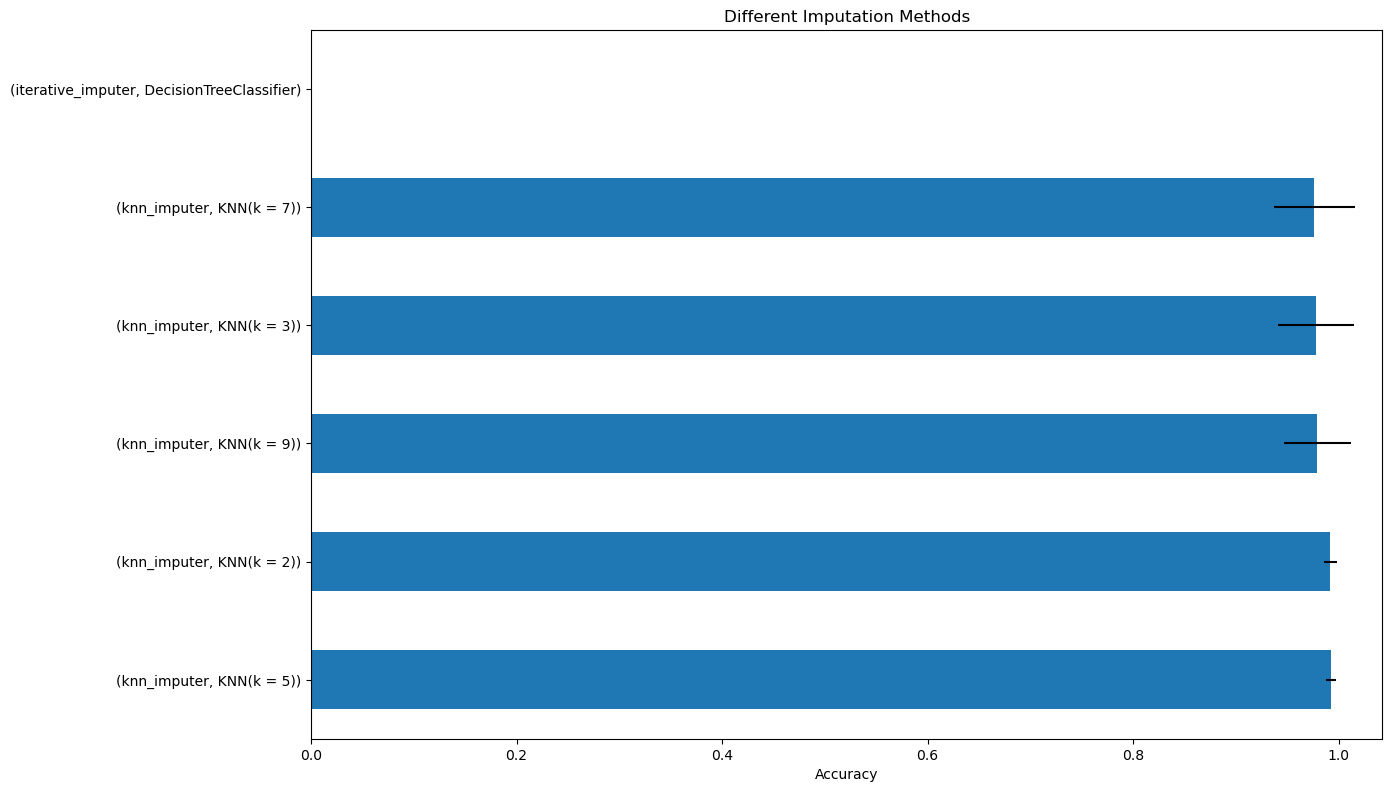

In [19]:
from sklearn.ensemble import  RandomForestClassifier
#from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier

# Set global configs
cv = 5
scoring = "accuracy"
state = 0
forest = RandomForestClassifier()

# Store IterativeImputer scores
ii_scores = pd.DataFrame()
for estimator in [DecisionTreeClassifier()]:
    pipe = make_pipeline(
        IterativeImputer(estimator=estimator, random_state=state), forest
    )
    ii_scores[estimator.__class__.__name__] = cross_val_score(
        pipe, X_full, y_full, scoring=scoring, cv=cv
    )

# Store KNN scores
knn_scores = pd.DataFrame()
n_neighbors = [2, 3, 5, 7, 9]
for k in n_neighbors:
    pipe = make_pipeline(KNNImputer(n_neighbors=k), forest)
    knn_scores[f"KNN(k = {k})"] = cross_val_score(
        pipe, X_full, y_full, scoring=scoring, cv=cv
    )

# Combines scores into a single DF
final_scores = pd.concat(
    [ii_scores, knn_scores],
    axis=1,
    keys=["iterative_imputer", "knn_imputer"],
)

# Plot
fig, ax = plt.subplots(figsize=(14, 8))

means, errors = final_scores.mean().sort_values(ascending=False), final_scores.std()
means.plot.barh(xerr=errors, ax=ax)

ax.set_title("Different Imputation Methods")
ax.set_xlabel("Accuracy")
ax.set_yticks(np.arange(means.shape[0]))

plt.tight_layout(pad=1)
plt.show();